# Regularization and Standardization

**Problem:** LogisticRegression is sensative to scaling issue that might result from changing units used.

**Why:** LogisticRegression apply *regularization*, which prefers to use small coefficients (the idea is that models with smaller coefficients are simpler).  LinearRegression does not apply regularization, but similar models not covered in 320 (RidgeRegression and LassoRegression do).

**Solution:** *standardize* the features

## Demo Data

* Let's say the same quantity is measured (with error) 3 times
* Whenever the true length (unknown) is >5, the thing we're measuring is categorized as True.

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
%matplotlib inline

In [46]:
true_feet = np.random.normal(4, size=1000)
category = true_feet > 5
df = pd.DataFrame({
    "x1": true_feet + np.random.normal(size=len(true_feet)),
    "x2": (true_feet + np.random.normal(size=len(true_feet))) / 5280, # ft => mi
    "x3": true_feet + np.random.normal(size=len(true_feet)),
    "y": category
})
train, test = df.iloc[:500].copy(), df.iloc[500:].copy()
train.head()

,x1,x2,x3,y
0,1.006352,0.000064,3.161445,False
1,5.897718,0.001213,5.458255,True
2,3.148717,0.000398,3.557861,False
3,3.034777,0.001033,6.752629,False
4,2.525495,0.000301,3.451702,False


In [47]:
# manually standardize
# X = train.loc[:, "x1":"x3"]
# X = (X - X.mean()) / X.std()
# train.loc[:, "x1":"x3"] = X

In [48]:
xcols = ["x1", "x2", "x3"]
model = LogisticRegression()
model.fit(train[xcols], train["y"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
model.score(test[xcols], test["y"])

0.88

In [50]:
test["y"].value_counts() / len(test)

False    0.85
True     0.15
Name: y, dtype: float64

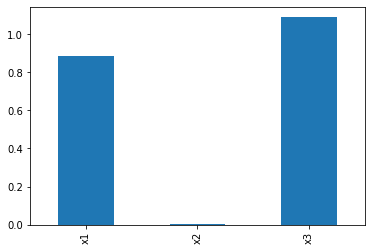

In [51]:
pd.Series(model.coef_.reshape(-1), index=xcols).plot.bar()

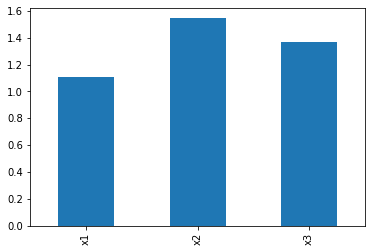

In [59]:
model = Pipeline([
    ("std", StandardScaler()),
    ("logr", LogisticRegression())
])
model.fit(train[xcols], train["y"])
model.score(test[xcols], test["y"])
pd.Series(model["logr"].coef_.reshape(-1), index=xcols).plot.bar()